In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('student_clustering.csv')

In [6]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


<Axes: xlabel='cgpa', ylabel='iq'>

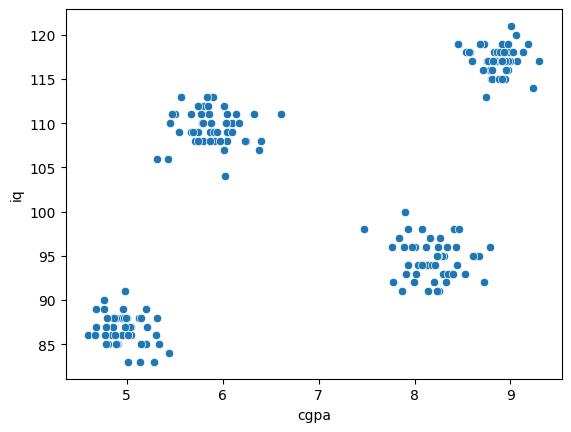

In [7]:
sns.scatterplot(df, x='cgpa', y='iq')

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = []

for i in range(1, 11):
    kmc = KMeans(n_clusters=i)
    # since k means clustering is an unsupervised learning, so we give the whole dataset
    kmc.fit_predict(df)
    wcss.append(kmc.inertia_)
    

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


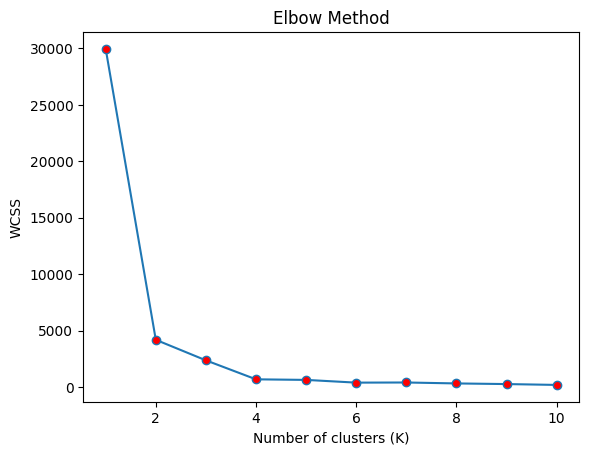

In [15]:
plt.plot(range(1, 11), wcss, marker='o', markerfacecolor='red')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [17]:
x = df.iloc[:,:].values
kmc1 = KMeans(n_clusters=4)
y_means = kmc1.fit_predict(x)

array([8.36, 8.27, 8.41, 8.09, 8.16, 8.31, 7.87, 7.47, 7.78, 7.93, 8.04,
       7.77, 8.  , 8.43, 8.02, 8.14, 8.12, 8.34, 8.65, 8.53, 8.29, 7.93,
       8.72, 8.14, 8.2 , 8.67, 8.18, 8.61, 7.99, 8.08, 8.26, 8.25, 8.4 ,
       7.84, 8.08, 8.25, 8.3 , 7.9 , 7.97, 8.21, 8.23, 8.35, 8.33, 8.46,
       7.89, 7.91, 8.23, 8.4 , 8.44, 8.79])

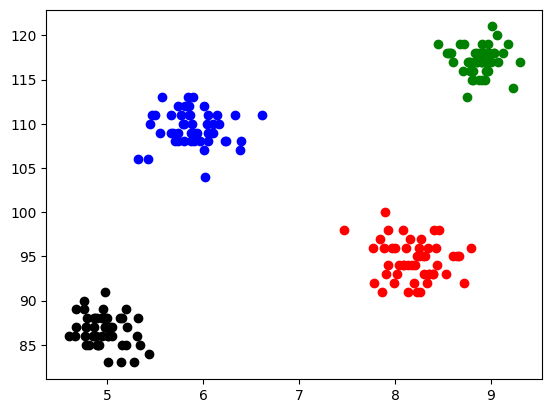

In [28]:
colors = ['blue', 'red', 'green', 'black']
for i in range(0,4):
    plt.scatter(x[y_means==i, 0], x[y_means==i, 1], color=colors[i])

># Real World Dataset

In [30]:
data = pd.read_csv('Mall_Customers.csv').drop(['CustomerID', 'Genre'], axis=1)

In [31]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [32]:
import plotly.express as px

In [34]:
fig = px.scatter_3d(
    data,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    size_max=10,
    opacity=0.8
)
fig.show()

In [35]:
wcss = []

for i in range(1, 16):
    kmc = KMeans(n_clusters=i)
    # since k means clustering is an unsupervised learning, so we give the whole dataset
    kmc.fit_predict(data)
    wcss.append(kmc.inertia_)
    

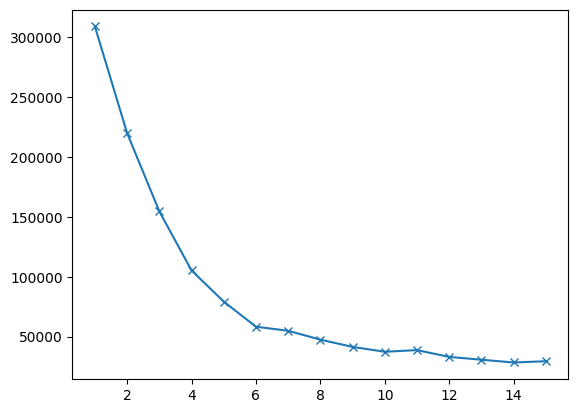

In [36]:
plt.plot(range(1, 16), wcss, marker='x')

In [41]:
x_values = data.iloc[:,:].values
kmc2 = KMeans(n_clusters=6)
data['Cluster'] = kmc2.fit_predict(x_values)

In [49]:
kmc2.cluster_centers_

array([[ 25.27272727,  25.72727273,  79.36363636],
       [ 43.12820513,  54.61538462,  50.02564103],
       [ 39.25      , 124.        ,  17.5       ],
       [ 32.69230769,  86.53846154,  82.12820513],
       [ 45.2173913 ,  26.30434783,  20.91304348],
       [ 40.52941176,  82.64705882,  18.76470588]])

In [48]:
fig = px.scatter_3d(
    data,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='Cluster',
    opacity=0.7
)
fig.show()